In [1]:
# AI-Driven Antenna Switching System for 5G Networks
#This project uses AI to dynamically select the optimal antenna for given 5G network conditions, improving throughput and reducing interference.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [3]:
# For reproducibility
np.random.seed(42)
samples = 1000

# Simulated 5G channel conditions
df = pd.DataFrame({
    "SNR": np.random.uniform(5, 30, samples),          # dB
    "Distance": np.random.uniform(50, 500, samples),   # meters
    "Angle": np.random.uniform(0, 90, samples),        # degrees
    "Interference": np.random.uniform(0, 1, samples)   # normalized
})

# Label antennas based on simple rules (used to generate training data)
def antenna_rule(row):
    if row["SNR"] > 20 and row["Interference"] < 0.3:
        return 3    # Directional
    elif row["SNR"] > 12:
        return 2    # Medium gain
    else:
        return 1    # Wide coverage

df["Selected_Antenna"] = df.apply(antenna_rule, axis=1)
df.head()


,SNR,Distance,Angle,Interference,Selected_Antenna
0,14.363503,133.309818,23.553512,0.672703,2
1,28.767858,293.855426,22.228092,0.796681,2
2,23.299849,442.825626,81.562912,0.250468,3
3,19.966462,379.501199,22.459158,0.624874,2
4,8.900466,412.952517,24.475475,0.571746,1


In [4]:
df.to_csv("antenna_switching_dataset.csv", index=False)
print("Dataset saved successfully!")


Dataset saved successfully!


In [5]:
dataset = pd.read_csv("antenna_switching_dataset.csv")
dataset.head()


,SNR,Distance,Angle,Interference,Selected_Antenna
0,14.363503,133.309818,23.553512,0.672703,2
1,28.767858,293.855426,22.228092,0.796681,2
2,23.299849,442.825626,81.562912,0.250468,3
3,19.966462,379.501199,22.459158,0.624874,2
4,8.900466,412.952517,24.475475,0.571746,1


In [6]:
dataset.info()
dataset.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SNR               1000 non-null   float64
 1   Distance          1000 non-null   float64
 2   Angle             1000 non-null   float64
 3   Interference      1000 non-null   float64
 4   Selected_Antenna  1000 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 39.2 KB


,SNR,Distance,Angle,Interference,Selected_Antenna
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,17.256414,278.157787,45.216515,0.490375,1.838000
std,7.303434,131.485452,26.160678,0.286489,0.638877
min,5.115801,51.448219,0.001047,0.000653,1.000000
25%,10.899332,158.483422,23.521588,0.241901,1.000000
50%,17.420184,283.430258,45.055253,0.484279,2.000000
75%,23.607990,392.209276,68.319317,0.737541,2.000000
max,29.992942,499.736177,89.803877,0.999558,3.000000


In [7]:
X = dataset.drop("Selected_Antenna", axis=1)
y = dataset["Selected_Antenna"]

print("Features shape:", X.shape)
print("Labels shape:", y.shape)


Features shape: (1000, 4)
Labels shape: (1000,)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 800
Testing samples: 200


In [9]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [10]:
joblib.dump(model, "antenna_switching_model.pkl")
print("Model saved successfully")


Model saved successfully


In [11]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Antenna Switching Accuracy:", round(accuracy*100,2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Antenna Switching Accuracy: 99.5 %

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        63
           2       0.99      1.00      1.00       111
           3       1.00      0.96      0.98        26

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



In [12]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[ 63   0   0]
 [  0 111   0]
 [  0   1  25]]


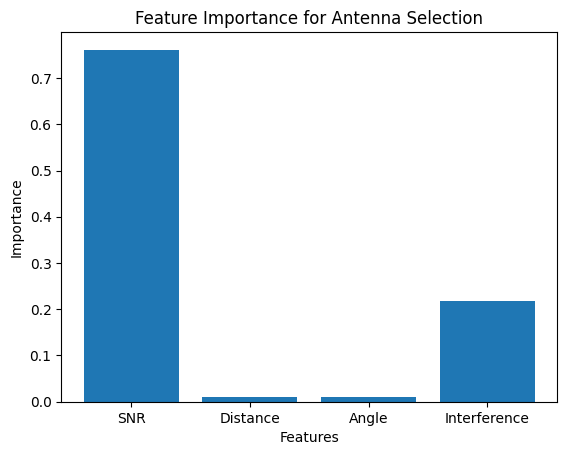

In [13]:
importances = model.feature_importances_
features = X.columns

plt.figure()
plt.bar(features, importances)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance for Antenna Selection")
plt.show()


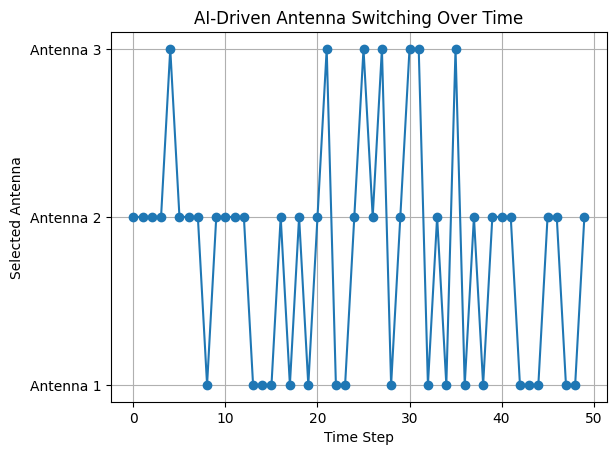

In [14]:
time_steps = 50
sample_data = X_test.iloc[:time_steps]
switching = model.predict(sample_data)

plt.figure()
plt.plot(range(time_steps), switching, marker='o')
plt.yticks([1,2,3], ["Antenna 1", "Antenna 2", "Antenna 3"])
plt.xlabel("Time Step")
plt.ylabel("Selected Antenna")
plt.title("AI-Driven Antenna Switching Over Time")
plt.grid(True)
plt.show()


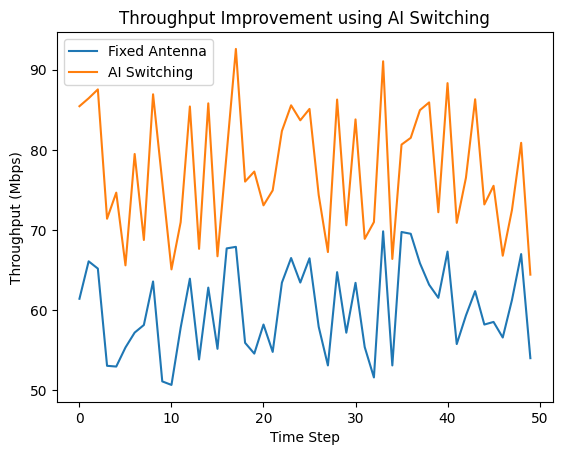

In [15]:
fixed_throughput = np.random.uniform(50, 70, time_steps)
ai_throughput = fixed_throughput + np.random.uniform(10, 25, time_steps)

plt.figure()
plt.plot(fixed_throughput, label="Fixed Antenna")
plt.plot(ai_throughput, label="AI Switching")
plt.xlabel("Time Step")
plt.ylabel("Throughput (Mbps)")
plt.title("Throughput Improvement using AI Switching")
plt.legend()
plt.show()


In [20]:
# Load model (if not already loaded)
model = joblib.load("antenna_switching_model.pkl")

def select_best_antenna(SNR, Distance, Angle, Interference):
    input_data = pd.DataFrame({
        "SNR": [SNR],
        "Distance": [Distance],
        "Angle": [Angle],
        "Interference": [Interference]
    })
    
    antenna = model.predict(input_data)[0]
    
    antenna_names = {
        1: "Antenna 1 (Wide Coverage)",
        2: "Antenna 2 (Medium Gain)",
        3: "Antenna 3 (Directional High Gain)"
    }
    
    return antenna_names[antenna]


In [27]:
result = select_best_antenna(SNR=27, Distance=200, Angle=35, Interference=0.2)
print("Best Antenna →", result)

# Try another
print(select_best_antenna(22, 200, 70, 0.2))
print(select_best_antenna(17, 400, 70, 0.7))


Best Antenna → Antenna 3 (Directional High Gain)
Antenna 3 (Directional High Gain)
Antenna 2 (Medium Gain)
